# Data Mining & Decision Systems ACW - Medical Records

## Sad Khalid Qayyum (561438)

##### PIP installs and imports

In [1]:
#!pip install seaborn --user
#!pip install sklearn --user
#!pip install scikit-plot --user

In [2]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import copy
import sklearn as skl
import scikitplot as skplt
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from scikitplot.metrics import plot_confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

## Data Understanding & Data Cleaning

#### Raw data

In [3]:
#Read the data file and treat all the blaqnk spaces as NaN values:
#Make a Deep Copy of the original file:
null_Value = " "
data = pd.read_csv(r'\\adir.hull.ac.uk\home\561\561438\Documentos\Data Mining & Decision Systems\ACW\600092_data.csv', na_values = null_Value)
deepCopy = copy.deepcopy(data)
deepCopy

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,0.602437,218242,A-F,no,no,yes,no,no,78.0,20.0,NoRisk
1,0.602437,159284,TIA,no,no,no,no,no,70.0,60.0,NoRisk
2,0.602437,106066,A-F,no,yes,yes,no,no,95.0,40.0,Risk
3,0.128157,229592,TIA,no,no,yes,no,no,90.0,85.0,Risk
4,0.676862,245829,CVA,no,no,no,no,no,70.0,20.0,NoRisk
...,...,...,...,...,...,...,...,...,...,...,...
1515,0.391440,93406,A-F,no,yes,no,no,no,76.0,60.0,NoRisk
1516,0.253504,121814,A-F,no,no,yes,yes,no,90.0,75.0,Risk
1517,0.620373,101754,TIA,no,no,yes,no,no,75.0,20.0,NoRisk
1518,0.639342,263836,A-F,no,yes,no,no,no,70.0,45.0,NoRisk


###### Find all values and count them

In [4]:
#1 Get the specific coumn from the deep copy:
#2 Get all the unique values from a specific column:

df = pd.DataFrame(deepCopy, columns=['Random']) #1
Random_Null_Values = df['Random'].unique() #2

df = pd.DataFrame(deepCopy, columns=['Id']) #1
Id_Null_Values = df['Id'].unique() #2

df = pd.DataFrame(deepCopy, columns=['Indication']) #1
Indication_Null_Values = df['Indication'].unique() #2

df = pd.DataFrame(deepCopy, columns=['Diabetes']) #1
Diabetes_Null_Values = df['Diabetes'].unique() #2

df = pd.DataFrame(deepCopy, columns=['IHD']) #1
IHD_Null_Values = df['IHD'].unique() #2

df = pd.DataFrame(deepCopy, columns=['Hypertension']) #1
Hypertension_Null_Values = df['Hypertension'].unique() #2

df = pd.DataFrame(deepCopy, columns=['Arrhythmia']) #1
Arrhythmia_Null_Values = df['Arrhythmia'].unique() #2

df = pd.DataFrame(deepCopy, columns=['IPSI']) #1
IPSI_Null_Values = df['IPSI'].unique() #2

df = pd.DataFrame(deepCopy, columns=['History']) #1
History_Null_Values = df['History'].unique()

df = pd.DataFrame(deepCopy, columns=['Contra']) #1
Contra_Null_Values = df['Contra'].unique() #2

df = pd.DataFrame(deepCopy, columns=['label']) #1
Label_Null_Values = df['label'].unique() #2

#Print the number of Unique values for each column:

print("\033[4mNumber of Unique values\033[0m"
      "\033[1m\n\nRandom =\033[0m", Random_Null_Values,"\n"
      "\033[1m\nID =\033[0m", Id_Null_Values, "\n"
      "\033[1m\nIndication =\033[0m", Indication_Null_Values,"\n"
      "\033[1m\nDiabetes =\033[0m", Diabetes_Null_Values,"\n"
      "\033[1m\nIHD =\033[0m", IHD_Null_Values, "\n"
      "\033[1m\nHypertension =\033[0m", Hypertension_Null_Values, "\n"
      "\033[1m\nArrhythmia =\033[0m", Arrhythmia_Null_Values, "\n"
      "\033[1m\nIPSI =\033[0m", IPSI_Null_Values, "\n"
      "\033[1m\nHistory =\033[0m", History_Null_Values,"\n"
      "\033[1m\nContra =\033[0m", Contra_Null_Values, "\n",
      "\033[1m\nLabel =\033[0m", Label_Null_Values)

Number of Unique values

Random = [0.60243709 0.12815663 0.6768621  ... 0.62037252 0.63934177 0.6349223 ] 

ID = [218242 159284 106066 ... 101754 263836 254941] 

Indication = ['A-F' 'TIA' 'CVA' 'ASx' 'Asx' nan] 

Diabetes = ['no' 'yes' nan] 

IHD = ['no' 'yes'] 

Hypertension = ['yes' 'no' nan] 

Arrhythmia = ['no' 'yes'] 

IPSI = [78. 70. 95. 90. 75. 81. 80. 76. 82. 85. 68. 50. 73. 99. 71. 65. 74. 98.
 97. 60. 67. 79. 77. 84. 55. 35. 51. nan 69. 72.] 

History = ['no' 'yes' nan] 

Contra = [ 20.  60.  40.  85.  95. 100.  50.  30.  80.  25.  75.  10.  70.  15.
  35.  55.  90.  79.  45.  65.  62.  53.  51.  16.  73.  nan] 
 
Label = ['NoRisk' 'Risk' 'Unknown' nan]


###### Number of Nan values before Data Cleaning

In [5]:
#Count the amount of NaN values for each column and print the number of NaN values for each column

Count_NaN_Records = deepCopy.isna().sum()
print("\033[4mNumber of NaN values\033[0m\n")
print(Count_NaN_Records)

Number of NaN values

Random          0
Id              0
Indication      3
Diabetes        2
IHD             0
Hypertension    3
Arrhythmia      0
History         2
IPSI            4
Contra          1
label           3
dtype: int64


###### Renaming and fixing spelling mistakes

In [6]:
#Rewrite misspelt acronyms from Indication column:

deepCopy['Indication'] = deepCopy['Indication'].replace('ASx', 'ASX')
deepCopy['Indication'] = deepCopy['Indication'].replace('Asx', 'ASX')
##deepCopy['label'] = deepCopy['label'].fillna('BlahBlahBlah', inplace=False)

df = pd.DataFrame(deepCopy, columns=['Indication'])
Indication_Values = df['Indication'].unique()

Indication_Values

array(['A-F', 'TIA', 'CVA', 'ASX', nan], dtype=object)

###### Replacing Unkowns into NaNs

In [7]:
#Replace Unknown fields into NaNs in the end, they are the same thing:

deepCopy['label'] = deepCopy['label'].replace('Unknown', np.nan)

df = pd.DataFrame(deepCopy, columns=['label'])
Label_Null_Values = df['label'].unique()
Label_Null_Values

array(['NoRisk', 'Risk', nan], dtype=object)

## Dropping Records and Columns

###### Nan Values

In [8]:
#Display allt he rows that contain a NaN value and highlight all the NaNs in red:
df = pd.DataFrame(deepCopy)
find_Nulls = df[df.isna().any(axis=1)]
find_Nulls.style.applymap(lambda x: "background: #ff4747" if pd.isnull(x) else "background: #7aff81")
##df.style.highlight_null(null_color='red')

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
201,0.38879,240232,CVA,yes,no,nan,yes,no,95,90,Risk
337,0.617072,260770,CVA,no,yes,no,no,nan,85,50,NoRisk
442,0.648122,261060,nan,no,yes,yes,no,no,70,40,NoRisk
447,0.681744,224257,CVA,nan,yes,yes,yes,no,90,100,Risk
453,0.518558,254469,ASX,no,no,yes,no,no,70,nan,NoRisk
475,0.298074,173791,ASX,no,yes,yes,no,no,70,55,nan
514,0.39213,210861,A-F,nan,no,yes,no,no,80,40,NoRisk
523,0.46017,283846,CVA,no,no,yes,yes,no,95,100,nan
590,0.70795,289096,A-F,no,no,nan,no,no,78,30,NoRisk
620,0.283872,227779,A-F,no,no,no,no,no,nan,100,Risk


In [9]:
#Count how many null values there are in total
Current_NaN_Records = deepCopy.isna().sum().sum()
Current_NaN_Records

20

In [10]:
#Count all the records
All_Records = deepCopy.shape[0]
All_Records

1520

In [11]:
print("Total amount of valid records =", (All_Records - Current_NaN_Records))

Total amount of valid records = 1500


##### Number of invalid records in the data


                       Number of invalid records in the data                        


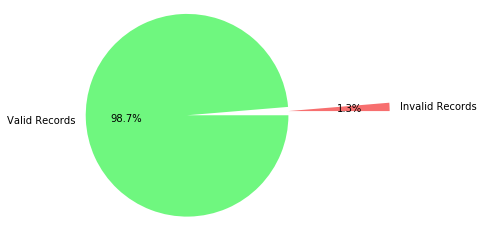

In [12]:
#Amount of NaNs compared to the amount of Valid Records represented in a pie chart

labels = "Invalid Records", "Valid Records"
sizes = [Current_NaN_Records, (All_Records - Current_NaN_Records)]
colors = ['#f76f6f', '#6ff77f']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=360, colors = colors, explode=(1, 0))
plt.axis('Equal')

print('\n{:^100s}'.format("\033[4m\033[1mNumber of invalid records in the data\033[0m\033[0m"))

plt.show()

###### Random and ID

In [13]:
#Check if the values in the Random column are unique:

Random_Unique_Check = pd.Series(df['Random']).nunique()==len(pd.Series(df['Random']))
Random_Duplicate_Count = deepCopy["Random"].duplicated().sum()
print('Are all values in Random unique?', Random_Unique_Check, '\nHow many duplicates are there in Random?', Random_Duplicate_Count)

Are all values in Random unique? False 
How many duplicates are there in Random? 298


In [14]:
#1 = Count how many values there are in Random
#2 = Count how many duplicates there are
#3 = Calculate and print how many uniques there are

Random_Amount_Count = deepCopy['Random'].count().sum() #1
Random_Duplicate_Count =  Random_Duplicate_Count.sum() #2

print("There are ", Random_Amount_Count - Random_Duplicate_Count, "Unique values in 'Random'") #3


There are  1222 Unique values in 'Random'


In [15]:
#Check if values in Record are unique.
Random_Unique_Check = pd.Series(df['Id']).nunique()==len(pd.Series(df['Id']))
Random_Unique_Check

True


                        Number of duplicate values in Random                        


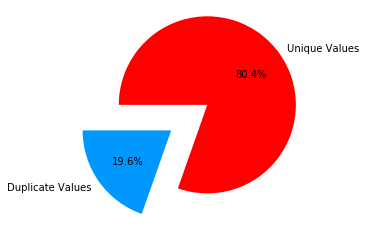

In [16]:
#Calculate how many non unique values there are in 'Random'
Duplicate_Percentage = ((Random_Duplicate_Count / Random_Amount_Count)*100)
Unique_Percentage = (((Random_Amount_Count - Random_Duplicate_Count) /Random_Amount_Count)*100)

labels = "Duplicate Values", "Unique Values"
sizes = [Duplicate_Percentage, Unique_Percentage]
colors = ['#0097FF', '#FF0000']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=180, colors = colors, explode=(0.5, 0))
plt.axis('Equal')

print('\n{:^100s}'.format("\033[4m\033[1mNumber of duplicate values in Random\033[0m\033[0m"))

plt.show()

##### Renaming and Dropping

In [17]:
#Drop all the records that have a NaN

deepCopy = deepCopy.dropna()
deepCopy

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,0.602437,218242,A-F,no,no,yes,no,no,78.0,20.0,NoRisk
1,0.602437,159284,TIA,no,no,no,no,no,70.0,60.0,NoRisk
2,0.602437,106066,A-F,no,yes,yes,no,no,95.0,40.0,Risk
3,0.128157,229592,TIA,no,no,yes,no,no,90.0,85.0,Risk
4,0.676862,245829,CVA,no,no,no,no,no,70.0,20.0,NoRisk
...,...,...,...,...,...,...,...,...,...,...,...
1515,0.391440,93406,A-F,no,yes,no,no,no,76.0,60.0,NoRisk
1516,0.253504,121814,A-F,no,no,yes,yes,no,90.0,75.0,Risk
1517,0.620373,101754,TIA,no,no,yes,no,no,75.0,20.0,NoRisk
1518,0.639342,263836,A-F,no,yes,no,no,no,70.0,45.0,NoRisk


In [18]:
print('\033[4mCurrent amount of NaNs after dropping them\033[0m')
Count_NaN_Records = deepCopy.isna().sum()
Count_NaN_Records

Current amount of NaNs after dropping them


Random          0
Id              0
Indication      0
Diabetes        0
IHD             0
Hypertension    0
Arrhythmia      0
History         0
IPSI            0
Contra          0
label           0
dtype: int64

### Table after Data Cleaning

In [19]:
#Drop Id and Random Columns
deepCopy = deepCopy.drop(columns=['Random'])
deepCopy = deepCopy.drop(columns=['Id'])

#1 Renaming "Label" column to "Risk" since the column title does not relate to the content of the column
#2 Print only the "Risk" column to verify the change
deepCopy.rename(columns = {'label' : 'Risk'}, inplace = True) #1
pd.DataFrame(deepCopy, columns = ['Risk']) #2

deepCopy

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,Risk
0,A-F,no,no,yes,no,no,78.0,20.0,NoRisk
1,TIA,no,no,no,no,no,70.0,60.0,NoRisk
2,A-F,no,yes,yes,no,no,95.0,40.0,Risk
3,TIA,no,no,yes,no,no,90.0,85.0,Risk
4,CVA,no,no,no,no,no,70.0,20.0,NoRisk
...,...,...,...,...,...,...,...,...,...
1515,A-F,no,yes,no,no,no,76.0,60.0,NoRisk
1516,A-F,no,no,yes,yes,no,90.0,75.0,Risk
1517,TIA,no,no,yes,no,no,75.0,20.0,NoRisk
1518,A-F,no,yes,no,no,no,70.0,45.0,NoRisk


## Graphs and Plots


             IPSP and Contra agains Risk              


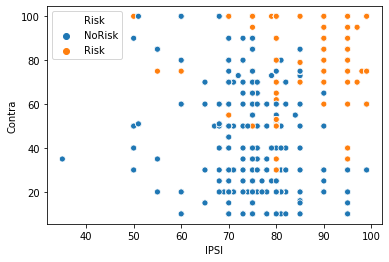

In [20]:
#Shows how people who have certain level of Contra and IPSI can be at risk or not
print('\n{:^70s}'.format("\033[4m\033[1mIPSP and Contra agains Risk\033[0m\033[0m"))
sb.scatterplot(x= 'IPSI', y= 'Contra', data= deepCopy, hue = 'Risk')
plt.show()

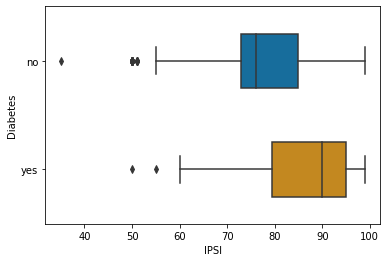

In [21]:
sb.boxplot(y='Diabetes', x='IPSI', data=deepCopy, width=0.5, palette="colorblind")
plt.show()

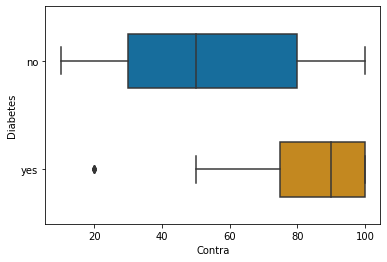

In [22]:
sb.boxplot(y='Diabetes', x='Contra', data=deepCopy, width=0.5, palette="colorblind")
plt.show()

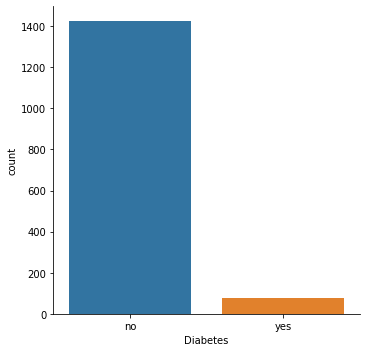

In [23]:
sb.catplot(x='Diabetes', data=deepCopy, kind='count')
plt.show()

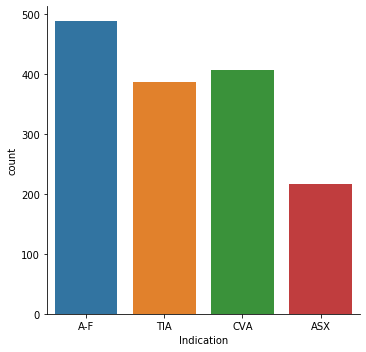

In [24]:
sb.catplot(x='Indication', data=deepCopy, kind='count')
plt.show()

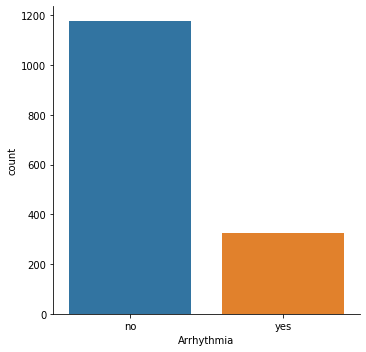

In [25]:
sb.catplot(x='Arrhythmia', data=deepCopy, kind='count')
plt.show()

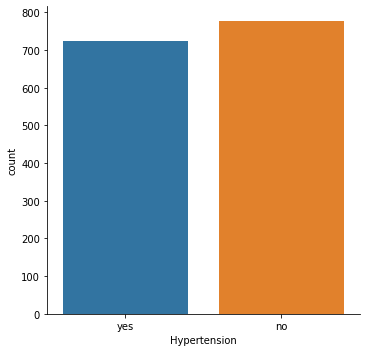

In [26]:
sb.catplot(x='Hypertension', data=deepCopy, kind='count')
plt.show()

## Modelling

### Replacing Boolean values to Binary values

In [27]:
#Replace NoRisk values to 0 and Risk values to 1 and save it in the deepCopy

deepCopy = deepCopy.replace('Risk', '1')
deepCopy = deepCopy.replace('NoRisk', '0')

#Replace No values with 0 and Yes values with 1 on all the columns containing those values
deepCopy = deepCopy.replace('yes', '1')
deepCopy = deepCopy.replace('no', '0')

deepCopy

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,Risk
0,A-F,0,0,1,0,0,78.0,20.0,0
1,TIA,0,0,0,0,0,70.0,60.0,0
2,A-F,0,1,1,0,0,95.0,40.0,1
3,TIA,0,0,1,0,0,90.0,85.0,1
4,CVA,0,0,0,0,0,70.0,20.0,0
...,...,...,...,...,...,...,...,...,...
1515,A-F,0,1,0,0,0,76.0,60.0,0
1516,A-F,0,0,1,1,0,90.0,75.0,1
1517,TIA,0,0,1,0,0,75.0,20.0,0
1518,A-F,0,1,0,0,0,70.0,45.0,0


###### Complete Binary Replacement Table

In [28]:
#1 Split indication column in the same number of unique values (4 unique values)
#2 Drop the Indiation Column
#3 Join the prevoiusly splitted table into the deepCopy

Indication_BinarySplit = pd.get_dummies(deepCopy['Indication']) #1
deepCopy = deepCopy.drop(columns = "Indication") #2
deepCopy = deepCopy.join(Indication_BinarySplit) #3

deepCopy

,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,Risk,A-F,ASX,CVA,TIA
0,0,0,1,0,0,78.0,20.0,0,1,0,0,0
1,0,0,0,0,0,70.0,60.0,0,0,0,0,1
2,0,1,1,0,0,95.0,40.0,1,1,0,0,0
3,0,0,1,0,0,90.0,85.0,1,0,0,0,1
4,0,0,0,0,0,70.0,20.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1515,0,1,0,0,0,76.0,60.0,0,1,0,0,0
1516,0,0,1,1,0,90.0,75.0,1,1,0,0,0
1517,0,0,1,0,0,75.0,20.0,0,0,0,0,1
1518,0,1,0,0,0,70.0,45.0,0,1,0,0,0


### Decision Tree

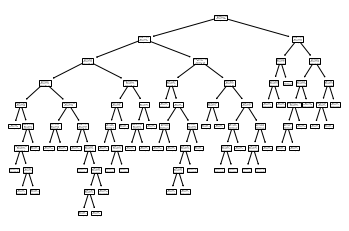

In [29]:
df = pd.DataFrame(deepCopy)

train, test = train_test_split(deepCopy, test_size=0.3, train_size=0.7, shuffle=False)
train_y = train['Risk']
train_x = train.drop('Risk', axis=1)
test_y = test['Risk']
test_x = test.drop('Risk', axis=1)

model = DecisionTreeClassifier()
model.fit(X = train_x, y = train_y)

plot_tree(model, feature_names = df.columns)
plt.rcParams['figure.figsize'] = (10,10)

### Confusion Matrix Based on Decision Tree

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       300
           1       0.98      0.95      0.96       150

    accuracy                           0.98       450
   macro avg       0.98      0.97      0.97       450
weighted avg       0.98      0.98      0.98       450



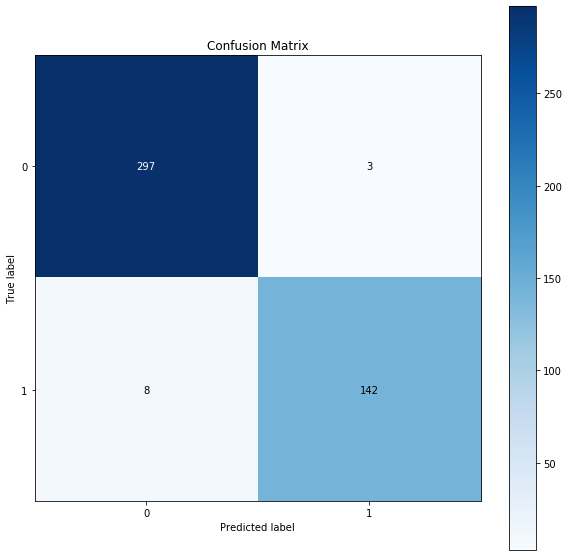

Accuracy Score = 97.6%


In [30]:
predict_y = model.predict(test_x)

plot_confusion_matrix(test_y, predict_y)
print(classification_report(test_y, predict_y))

plt.show()

#Print the accuracy Score and round it up
print("\033[4mAccuracy Score = " + str(round((accuracy_score(test_y, predict_y)*100), 1) )+ '%\033[0m')

### Multi Layer Perceptron Confusion Matrix

In [39]:
mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)
mlp.fit(train_x,train_y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(13, 13, 13), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

Confusion Matrix
 [[297   3]
 [  8 142]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       300
           1       0.97      0.87      0.92       150

    accuracy                           0.95       450
   macro avg       0.95      0.93      0.94       450
weighted avg       0.95      0.95      0.95       450



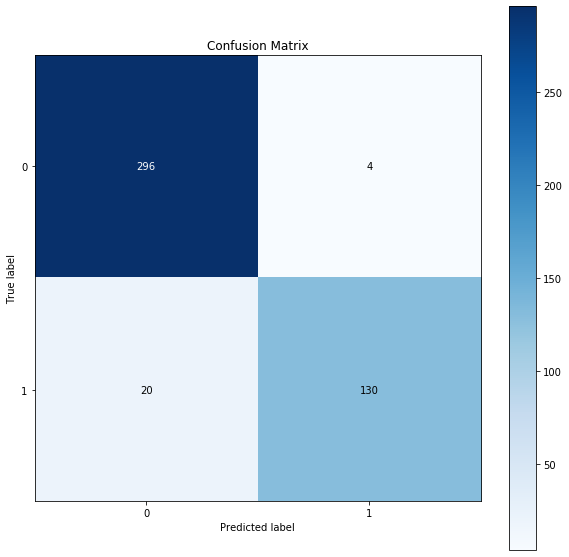

MLP Accuracy Score = 94.7%


In [32]:
predictions = mlp.predict(test_x)
print("Confusion Matrix\n", confusion_matrix(test_y , model.predict(test_x)))
plot_confusion_matrix(test_y, predictions)
print(classification_report(test_y, predictions))

plt.show()
print("\033[4mMLP Accuracy Score = " + str(round((accuracy_score(test_y, predictions)*100), 1) )+ '%\033[0m')

###### K-Nearest Neighbours Algorithm

In [33]:
scaler = StandardScaler()
scaler.fit(train_x)

train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

In [34]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(train_x, train_y)
y_pred = classifier.predict(test_x)

print(confusion_matrix(test_y, y_pred))
print(classification_report(test_y, y_pred))

[[293   7]
 [  9 141]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       300
           1       0.95      0.94      0.95       150

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.96      0.96      0.96       450



In [35]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x, train_y)
    pred_i = knn.predict(test_x)
    error.append(np.mean(pred_i != test_y))

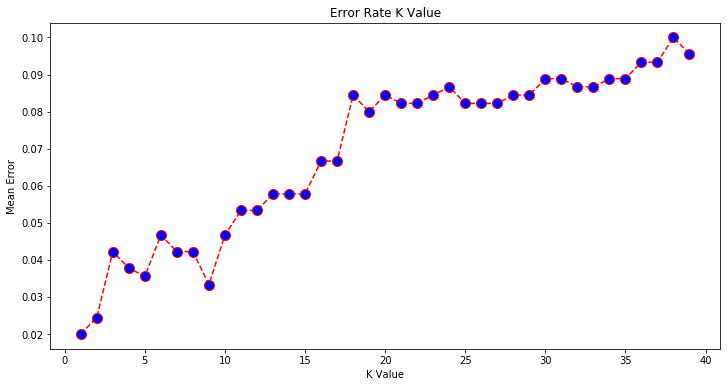

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

###### K-Nearest Neighbours Algorithm Confision Matrix

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       300
           1       0.95      0.94      0.95       150

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.96      0.96      0.96       450



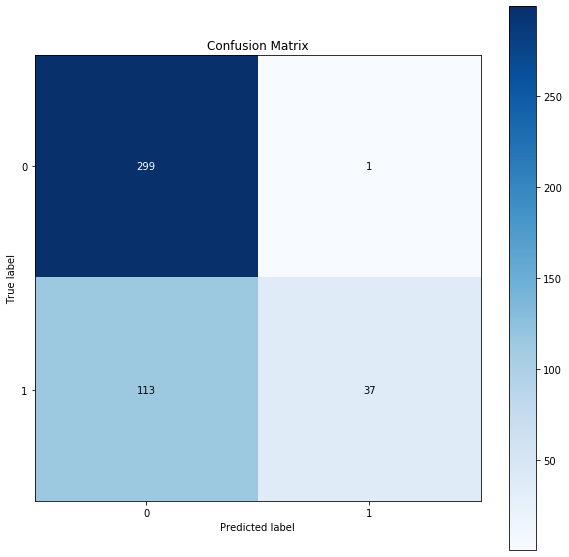

MLP Accuracy Score = 74.7%


In [37]:
predictions2 = mlp.predict(test_x)
plot_confusion_matrix(test_y, predictions2)
print(classification_report(test_y, y_pred))

plt.show()
print("\033[4mMLP Accuracy Score = " + str(round((accuracy_score(test_y, predictions2)*100), 1) )+ '%\033[0m')